In [ ]:
import math
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from collections import Counter
from sklearn.model_selection import train_test_split
import random

In [ ]:
class Node():
  def __init__(self):
    self.d_node=False
    self.left=None
    self.middle=None
    self.right=None
    self.attr=None
    self.label=None

In [ ]:
def bootstrap(n,train_set):
  bs=[]
  for i in range(n):
    bootstrap_sample = train_set.sample(len(train_set), replace=True)
    bs.append(bootstrap_sample)
  return bs

In [ ]:
def test_train_split(test_set, train_set,n):
  xtrain_arr=[]
  ytrain_arr=[]
  for i in range(n):
    ytrain_arr.append(train_set[i].iloc[:,-1])
    xtrain_arr.append(train_set[i].iloc[:])
  x_test = test_set.iloc[:]
  y_test = test_set.iloc[:,0]
  return x_test, y_test, xtrain_arr, ytrain_arr


In [ ]:
class DT():
  def __init__(self):
    self.build=0

  # def entropy_calc(self,df):
  #   if len(df)==0:
  #     return 0

  #   labels = df[:,0]
  #   # print(labels)


  #   arr=[]
  #   a=Counter(labels).most_common()
  #   # print(a)
  #   ent=0
  #   for i in range(len(a)):
  #     arr.append(a[i][1])
  #   # print(arr)
  #   if(len(arr)<2):
  #     return 0
  #   else:
  #     for i in range(len(arr)):
  #       ent+=(0-(arr[i]/sum(arr))*np.log2((arr[i]/sum(arr))))
  #   return ent

  def gini(self,df):
    if len(df)==0:
      return 0

    labels = df[:,-1]
    # print(labels)


    arr=[]
    a=Counter(labels).most_common()
    #print(a)
    gini=1
    for i in range(len(a)):
      arr.append(a[i][1])
    #print(arr)
    if(len(arr)<2):
      return 0
    else:
      for i in range(len(arr)):
        gini-=((arr[i]/sum(arr))**2)
    return gini

  def builder(self,df,cols,depth):
    self.split_by = -1
    best_feature_index = -1
    # n2=len(df[0])
    # print(n2)

    initial_gini = self.gini(df)
    # print(initial_entropy)
    # print()
    if initial_gini==1:
      # print('lef')
      fd=pd.DataFrame(df)
      # print(fd)
      # df_length = len(df[0])
      self.label = df[0][0]
      # print(self.label)
        # print(data_frame)
        # print()
        #print(len(data_frame[0])==17)
        #print()
      return -1

    info_gain=np.array([])
    gain_val=5
    total_entropy=[]
    f_to_use=0
    df_left=[]
    df_right=[]
    mean_split=0
    self.threshold=-1
    cols1=random.sample(cols,4)
    # cols1=cols
    # print(cols1)

    for feature in cols1:

      dff = pd.DataFrame(df)
      dff=dff.sort_values(by=feature)
      df=np.asarray(dff)
      mean_split = dff[feature].mean()
      # print(feature, mean_split)
      df_1 = dff.loc[dff[feature] <= mean_split ]
      df_2 = dff.loc[dff[feature] > mean_split ]
      g=df_1.shape[0]/dff.shape[0]*self.gini(np.asarray(df_1))+ \
                              df_2.shape[0]/dff.shape[0]*self.gini(np.asarray(df_2))
      if g<gain_val:
        # print(gain_val,g,feature)
        gain_val=g
        f_to_use=feature
        df_left = np.array(df_1)
        df_right = np.array(df_2)
        self.threshold=mean_split
    # print(f_to_use, self.threshold)
    # print(gain_val)
    # print(df_left)
    # print(df_right)


    self.split_by = f_to_use
    updated_attr = cols
    depth+=1

    temp_arr=[]
    temp_arr=np.asarray(df[:,0])
    molbc=Counter(temp_arr).most_common(1)[0][0]
    if((len(df_left)==0) or (len(df_right)==0)):
      # print(df_left)
      self.label = molbc
      self.split_by = -1
      return -1

    leaf=False
    #print(leaf)
    self.left = DT()
    self.right = DT()
    self.left.builder(df_left,updated_attr,depth)
    self.right.builder(df_right,updated_attr,depth)
    return -1

  def identifier(self,input):
    if(self.split_by==-1):
      # print('got label')
      return self.label
    # print()
    # print(self.split_by)
    f_val = input[self.split_by]
    # print(f_val, self.threshold)
    if(f_val<=self.threshold):
      # print('gone left')
      return self.left.identifier(input)

    else:
      # print('gone right')
      return self.right.identifier(input)
    return -1

In [ ]:
def majority_vote(result_array):
  m=[]
  one=1
  two=2
  three=3
  res_arr=np.array(result_array)
  for i in range(res_arr.shape[1]):
      ones = np.count_nonzero(res_arr[:, i] == 1)
      twos = np.count_nonzero(res_arr[:, i] == 2)
      threes = np.count_nonzero(res_arr[:, i] == 3)
      if ones>twos and ones>threes:
        m.append(one)
      elif twos > ones and twos > threes:
        m.append(two)
      else:
        m.append(three)

  return m

In [ ]:
def metrics(result_array, y_test):

# I have chosen class 1 to be positive and classes 2 and 3 to be negative.
# I followed the same for metric calculations.

  tp,tn,fp,fn=0,0,0,0
  acc,precision,recall,f1=0,0,0,0
  for i in range(len(y_test)):
    if result_array[i]==1:
      if y_test[i]==1:
        tp+=1
      else:
        fp+=1
    else:
      if y_test[i]==1:
        fn+=1
      else:
        tn+=1
  # print(tp,tn,fp,fn)
  acc = (tn+tp)/(tn+tp+fn+fp)
  precision = tp/(tp+fp)
  recall = tp/(tp+fn)
  f1 = 2*(precision*recall)/(precision+recall)

  return acc, precision, recall, f1

for n =  1   0.9160130718954248 0.8821428571428571 0.8666666666666666 0.8627228327228327
for n =  5   0.9616959064327485 0.931547619047619 0.9666666666666668 0.947069597069597
for n =  10   0.9777777777777779 0.9607142857142857 0.9833333333333332 0.968931068931069
for n =  20   0.9836257309941521 0.9714285714285715 0.9833333333333332 0.9755244755244755
for n =  30   0.9888888888888889 0.9857142857142858 0.9833333333333332 0.9832167832167833
for n =  40   0.9725146198830409 0.9607142857142857 0.9666666666666668 0.9598401598401598
for n =  50   0.9944444444444445 0.9857142857142858 1.0 0.9923076923076923
[0.9160130718954248, 0.9616959064327485, 0.9777777777777779, 0.9836257309941521, 0.9888888888888889, 0.9725146198830409, 0.9944444444444445]



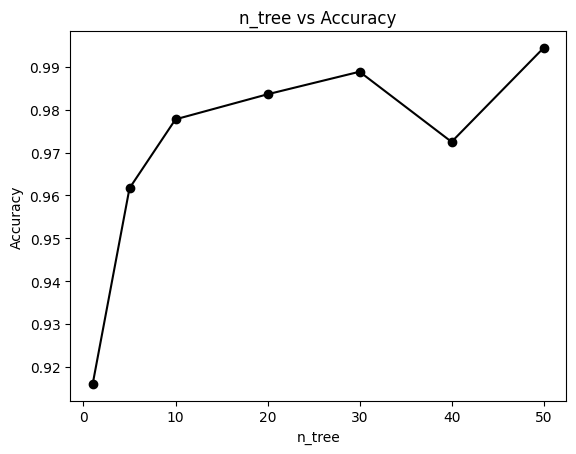


[0.8821428571428571, 0.931547619047619, 0.9607142857142857, 0.9714285714285715, 0.9857142857142858, 0.9607142857142857, 0.9857142857142858]



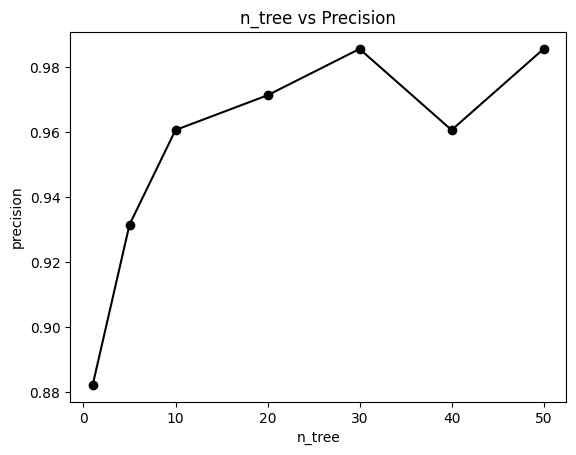


[0.8666666666666666, 0.9666666666666668, 0.9833333333333332, 0.9833333333333332, 0.9833333333333332, 0.9666666666666668, 1.0]



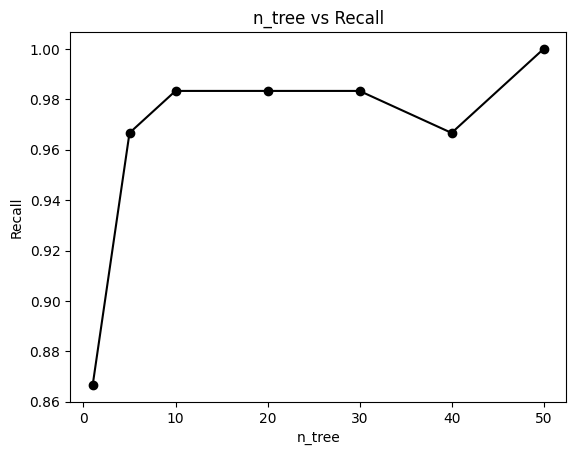


[0.8627228327228327, 0.947069597069597, 0.968931068931069, 0.9755244755244755, 0.9832167832167833, 0.9598401598401598, 0.9923076923076923]



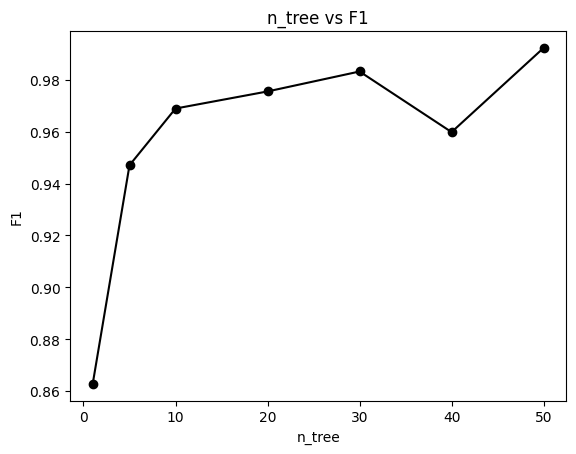

In [ ]:
df = pd.read_csv('/content/hw3_wine.csv')

obj = DT()
# obj.builder()
n_tree=[1,5,10,20,30,40,50]
k=10
df_1 = df[df['# class'] == 1]
df_2 = df[df['# class'] == 2]
df_3 = df[df['# class'] ==3]
dfs_1 = np.array_split(df_1, 10)
dfs_2 = np.array_split(df_2, 10)
dfs_3 = np.array_split(df_3, 10)
# print(df_3.index)
df_k=[]
boot_df=[]
for i in range(10):

  df_k.append(pd.concat([dfs_1[i],dfs_2[i],dfs_3[i]]))

# we have preserved the ratio and made 10 dfs of the same ratio

rf_k_test=[]
rf_k_train=[]
for k in range(10):
  # print(df_k[k].shape[0])
  train_set=pd.DataFrame()
  rf_k_test.append(df_k[k])
  for i in range(10):
    if i !=k :
      train_set = pd.concat([train_set, df_k[i]])
  rf_k_train.append(train_set)

cols=list(range(1,14))
plot_acc=[]
plot_pre=[]
plot_rec=[]
plot_f1=[]

for n in n_tree:
  # print(n)
  # print()
  acc_arr=[]
  pre_arr=[]
  f1_arr=[]
  rec_arr=[]
  for k in range(10):
    # print(k)
    b=bootstrap(n,rf_k_train[k])
    x_test, y_test, xtrain_arr, ytrain_arr = test_train_split(rf_k_test[k],b,n)
    x_test = np.asarray(x_test)
    y_test = np.asarray(y_test)
    result_array=[]
    for i in range(n):
      obj = DT()
      x_train = np.asarray(xtrain_arr[i])
      y_train = np.asarray(ytrain_arr[i])
      obj.builder(x_train,cols,depth=0)

      pred_test=[]
      acc_test=0
      for j in x_test:
        pred_test.append(obj.identifier(j))
        # print(pred_test)
      # print(pred_test)
      result_array.append(pred_test)
      # print(result_array)
    result_array_final=majority_vote(result_array)
    # print(len(result_array_final))
    # print(len(y_test))
    acc, precision, recall, f1 = metrics(result_array_final, y_test)
    # print(acc,precision,recall,f1)
    acc_arr.append(acc)
    pre_arr.append(precision)
    rec_arr.append(recall)
    f1_arr.append(f1)
  acc=sum(acc_arr)/len(acc_arr)
  plot_acc.append(acc)
  precision=sum(pre_arr)/len(pre_arr)
  plot_pre.append(precision)

  recall=sum(rec_arr)/len(rec_arr)
  plot_rec.append(recall)

  f1=sum(f1_arr)/len(f1_arr)
  plot_f1.append(f1)

  print('for n = ',n,' ',acc,precision,recall,f1)

print(plot_acc)
print()
plt.plot(n_tree, plot_acc, 'ko-')
plt.xlabel('n_tree')
plt.ylabel('Accuracy')
plt.title('n_tree vs Accuracy')
plt.show()
print()

print(plot_pre)
print()
plt.plot(n_tree, plot_pre, 'ko-')
plt.xlabel('n_tree')
plt.ylabel('precision')
plt.title('n_tree vs Precision')
plt.show()
print()

print(plot_rec)
print()
plt.plot(n_tree, plot_rec, 'ko-')
plt.xlabel('n_tree')
plt.ylabel('Recall')
plt.title('n_tree vs Recall')
plt.show()
print()

print(plot_f1)
print()
plt.plot(n_tree, plot_f1, 'ko-')
plt.xlabel('n_tree')
plt.ylabel('F1')
plt.title('n_tree vs F1')
plt.show()
print()